# Credit Fraud Detector
Building a Credit Fraud detector using various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud

## Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

### Reading the csv

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\Projects\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checking for null values

In [3]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.columns 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking the distribution of Fraud/No Fraud transactions in the dataset

In [6]:
No_fraud = round(df['Class'].value_counts()[0]/len(df) * 100,2)
Fraud = round(df['Class'].value_counts()[1]/len(df) * 100,2)

print(f'No Fraud is {No_fraud} % of the dataset')
print(f'Fraud is {Fraud} % of the dataset')

No Fraud is 99.83 % of the dataset
Fraud is 0.17 % of the dataset


The original dataset is **imbalanced**. Most of the transactions are non-fraud **(99.83%)**. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably **overfit** since it will "assume" that most transactions are not fraud

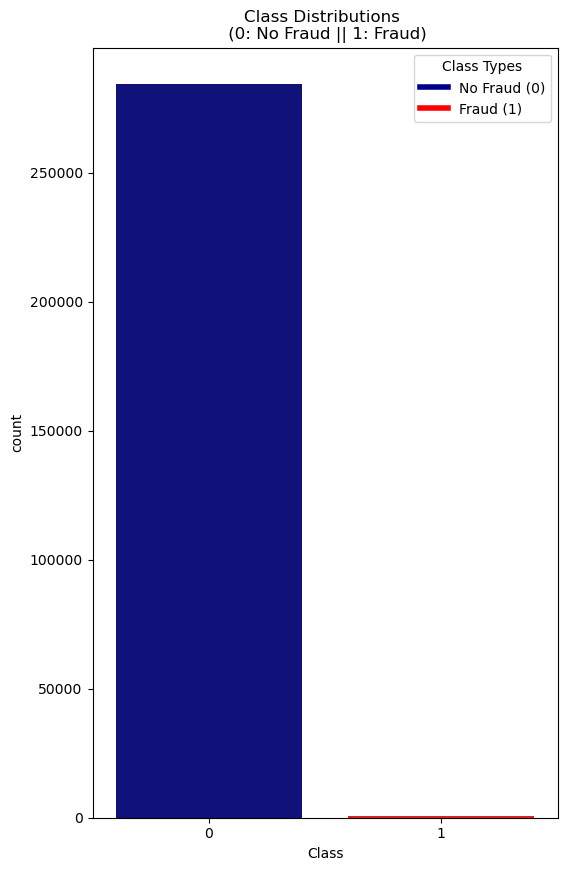

In [7]:
plt.figure(figsize = (6,10))
colors = ["darkblue", "red"]
sns.countplot(x = 'Class', data = df, palette = colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=12)
plt.legend(
    handles=[
        plt.Line2D([0], [0], color="darkblue", lw=4, label="No Fraud (0)"),
        plt.Line2D([0], [0], color="red", lw=4, label="Fraud (1)")
    ],
    title="Class Types",
    loc="upper right",
    fontsize=10
)

plt.show()

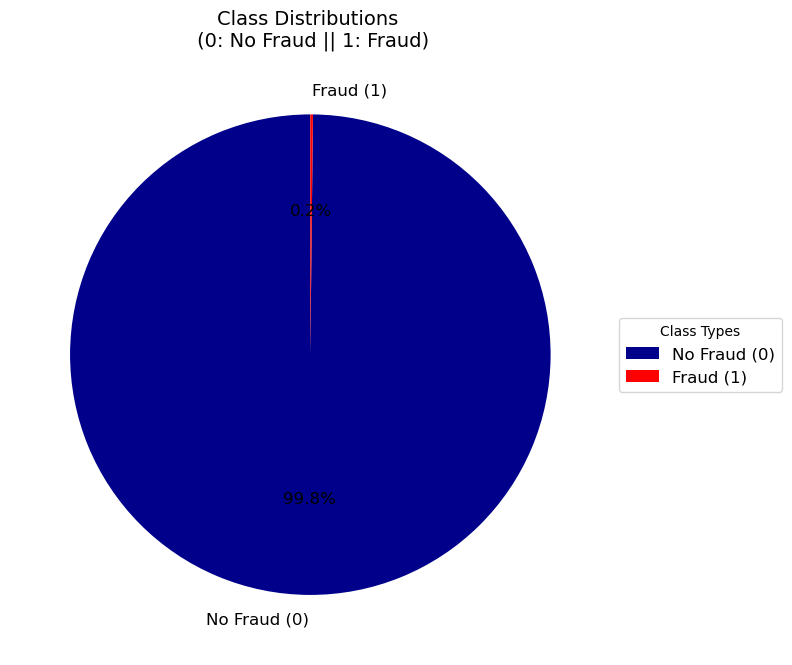

In [8]:
class_counts = df['Class'].value_counts()
labels = ['No Fraud (0)', 'Fraud (1)']
colors = ['darkblue', 'red']
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    class_counts, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'fontsize': 12}
)

plt.legend(wedges, labels, title="Class Types", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.tight_layout()

plt.show()

### Checking the Distribution Plots for Amount and Time

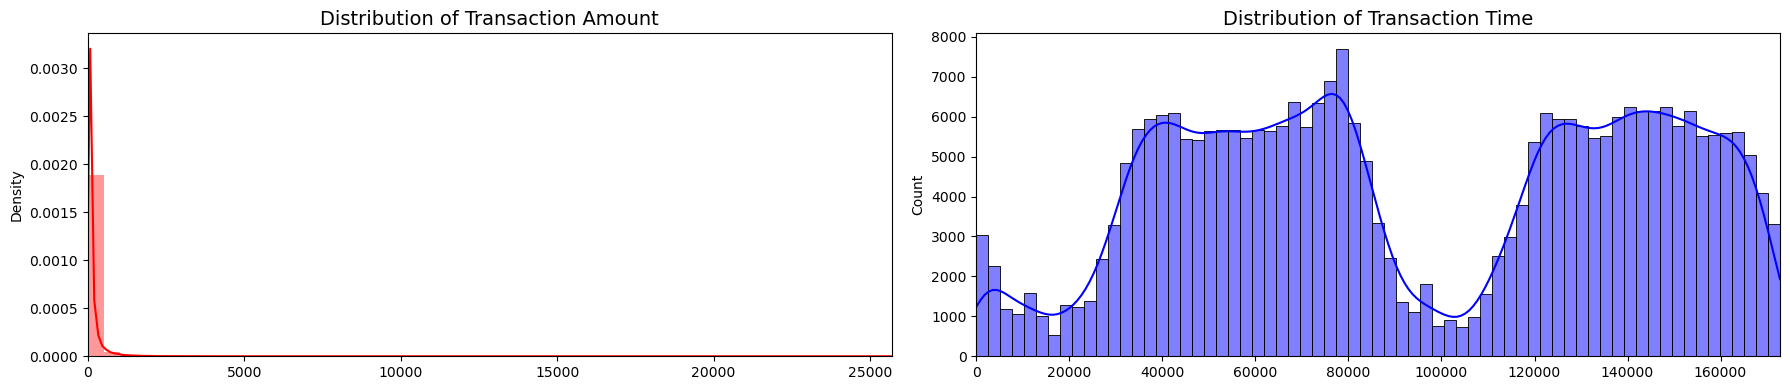

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# Plotting Transaction Amount Distribution
sns.distplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Plotting Transaction Time Distribution
sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.tight_layout()
plt.show()

### Scaling the Amount and Time columns in the dataset using the RobustScaler (It's good choice for handling outliers). 

In [10]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
df[['scaled_amount', 'scaled_time']] = rob_scaler.fit_transform(df[['Amount', 'Time']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)

Reordering columns with 'scaled_amount' and 'scaled_time' first

In [11]:
df = df[['scaled_amount', 'scaled_time'] + [col for col in df.columns if col not in ['scaled_amount', 'scaled_time']]]

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Data preprocessing and data splitting

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# Defining features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Stratified Shuffle Split
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    
    # Spliting the data
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Converting to numpy arrays for machine learning model input
original_Xtrain = original_Xtrain.to_numpy()
original_Xtest = original_Xtest.to_numpy()
original_ytrain = original_ytrain.to_numpy()
original_ytest = original_ytest.to_numpy()

# Checking label distribution in both train and test sets
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('-' * 100)

print('Label Distributions: \n')
print(f'Train set distribution: {train_counts_label / len(original_ytrain)}')
print(f'Test set distribution: {test_counts_label / len(original_ytest)}')

Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
----------------------------------------------------------------------------------------------------
Label Distributions: 

Train set distribution: [0.99827075 0.00172925]
Test set distribution: [0.99827955 0.00172045]


### Random Under-Sampling 
It consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.
It is to balance the class distribution because the original dataset is highly imbalanced i.e No Fraud is 99.83% and Fraud is 0.17% of the transactions.

In [13]:
fraud_count = df['Class'].value_counts()[1]
fraud_count

492

In [14]:
# Shuffling the dataframe
df = df.sample(frac=1)

# Creating Subsamples for Fraud and Non-Fraud Cases
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

# Combining the Subsamples:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffling the Balanced DataFrame:
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
95522,-0.167819,-0.227223,1.051066,-0.122236,1.366659,1.226947,-0.836598,0.471974,-0.731079,0.358833,...,-0.157197,0.031429,0.296199,0.036265,0.223396,0.286007,-0.409277,0.085727,0.026913,0
8615,-0.293440,-0.858363,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1
52831,0.530986,-0.458441,-2.955739,2.019871,-1.400509,0.789474,-0.801746,0.480932,-0.777149,1.804052,...,0.056387,0.121713,0.115468,-0.318049,-1.397401,0.032319,-0.197113,0.008422,0.130608,0
191690,-0.307413,0.524900,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,...,0.252571,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,1
118308,0.113743,-0.113476,-0.430330,0.985633,0.645789,0.317131,0.616332,-1.347462,1.078234,-0.161518,...,-0.115282,-0.016378,-0.207609,-0.164119,0.255280,0.454798,-0.505032,-0.039456,-0.006358,1


In [15]:
new_df.shape

(984, 31)

In [16]:
print('Distribution of Class in the subsample dataset (new_df)')
print(new_df['Class'].value_counts()/len(new_df))


Distribution of Class in the subsample dataset (new_df)
Class
0    0.5
1    0.5
Name: count, dtype: float64


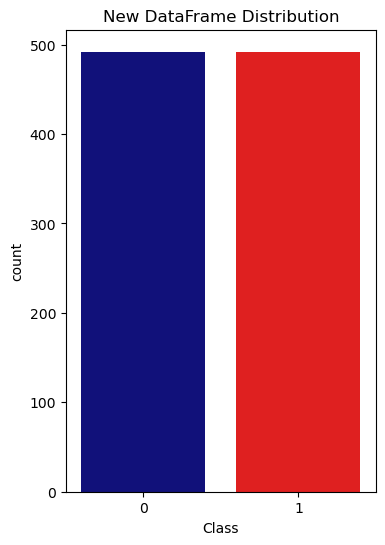

In [17]:
plt.figure(figsize = (4,6))
colors = ['darkblue', 'red']
sns.countplot(x='Class', data = new_df,  palette = colors)
plt.title('New DataFrame Distribution', fontsize = 12)

plt.show()

### Correlation Matrices

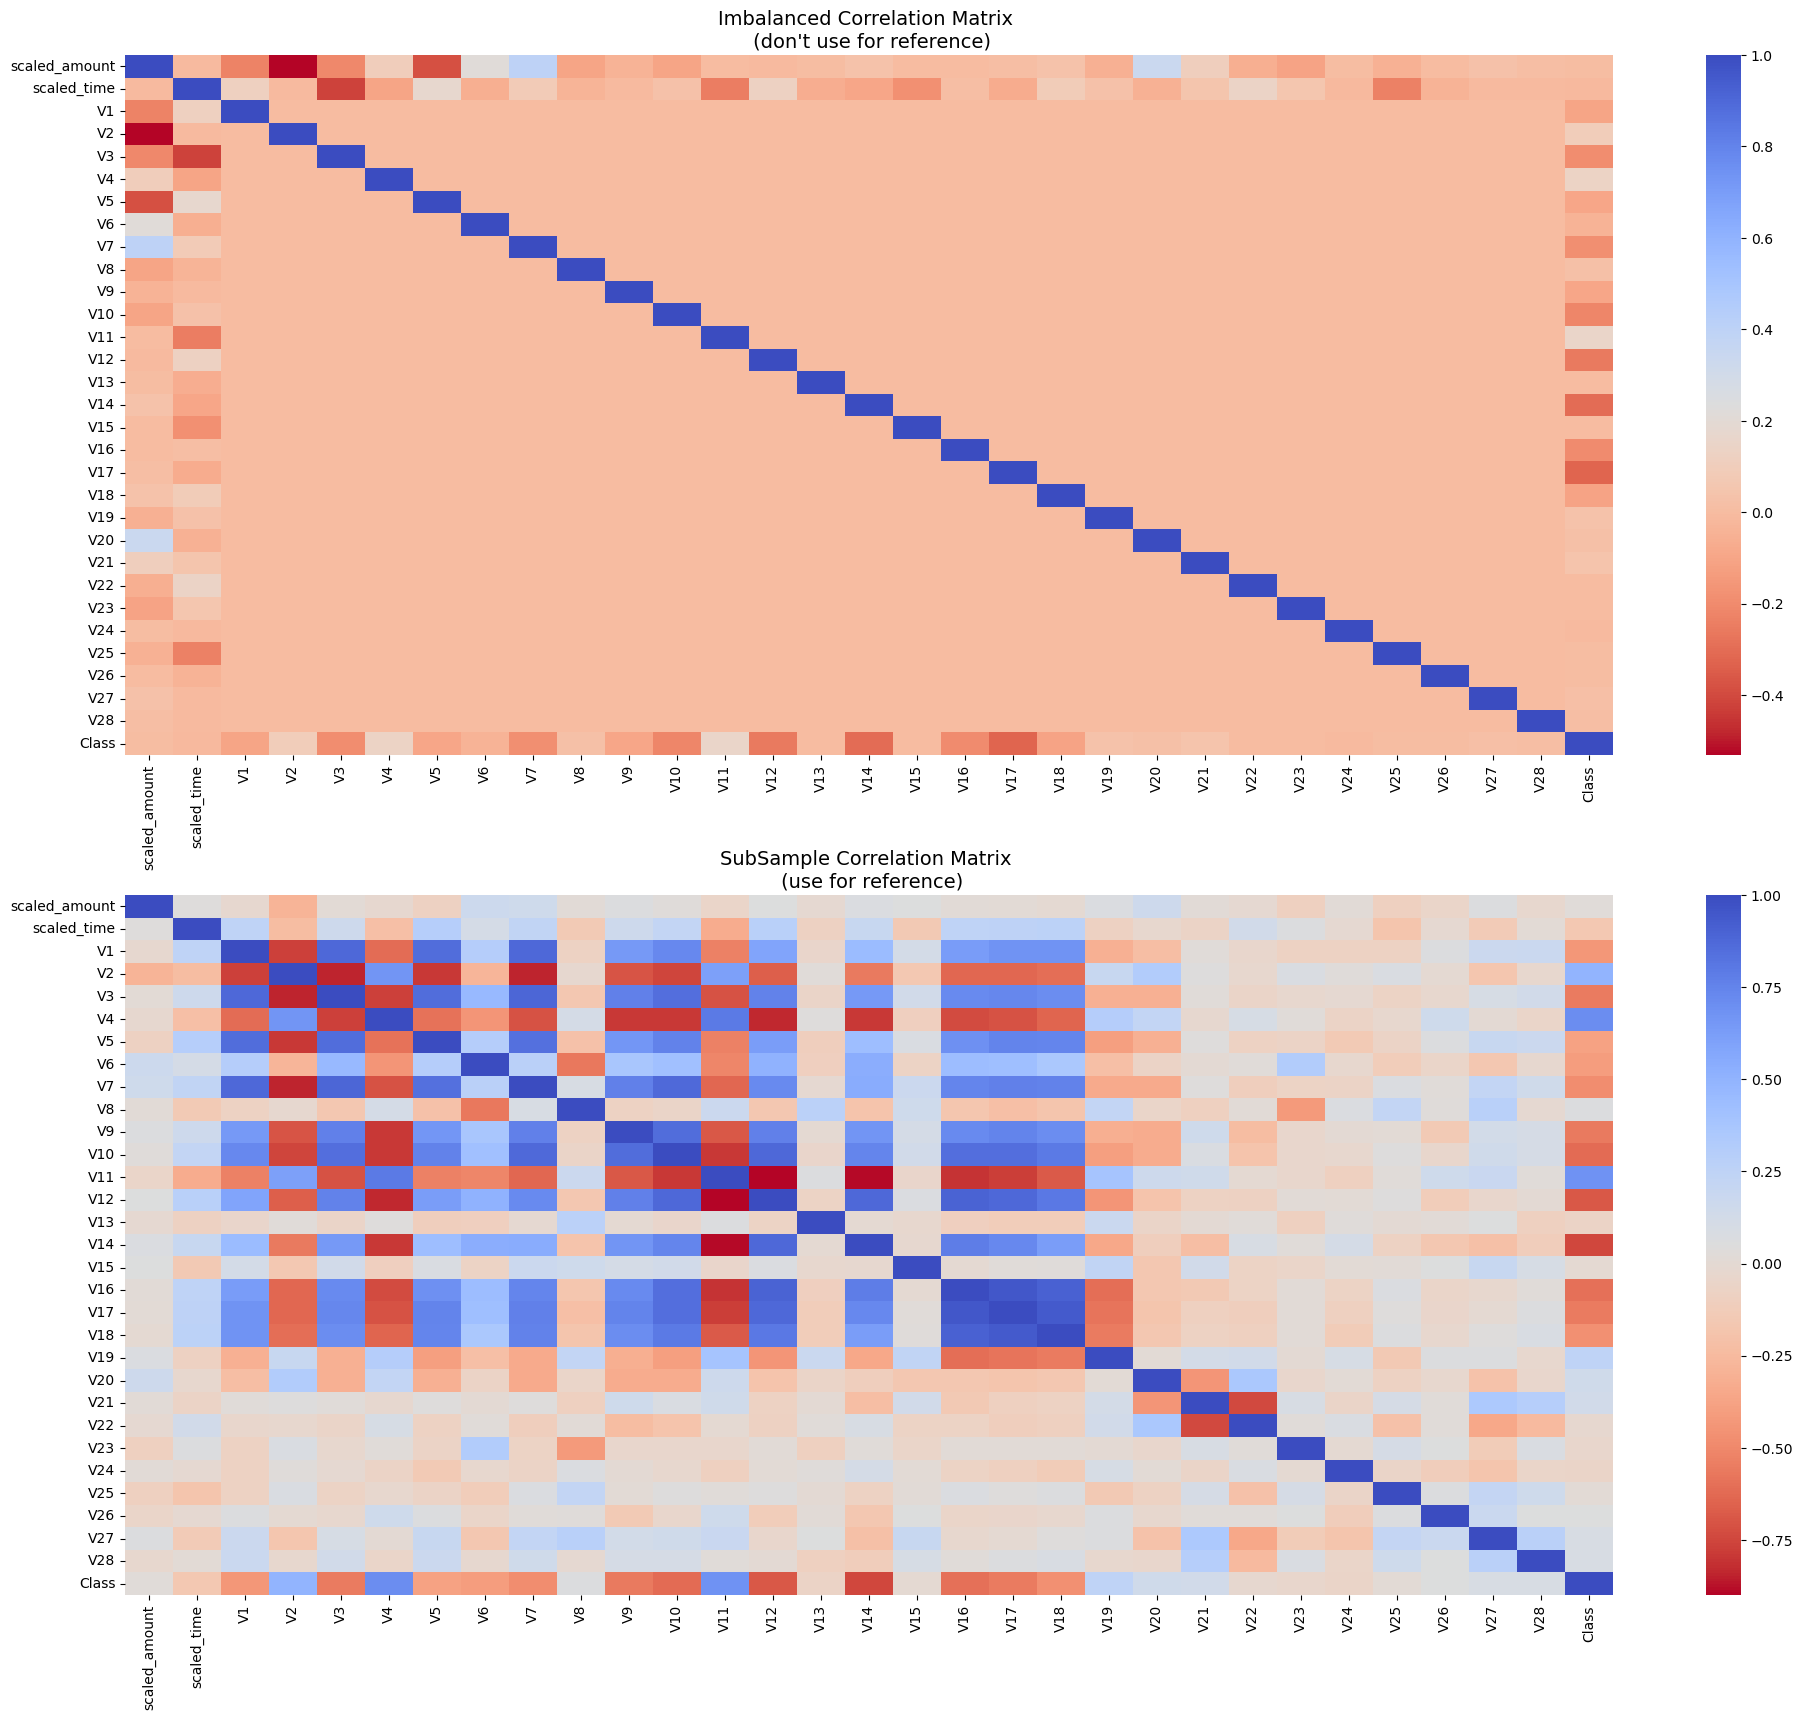

In [18]:
# Creating the Figure with Two Subplots
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Correlation Matrix for the Original Dataset (df)
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# Correlation Matrix for the Subsample Dataset (new_df)
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

plt.show()

Negative Correlations: V17, V16, V14, V12, V10 and V9 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

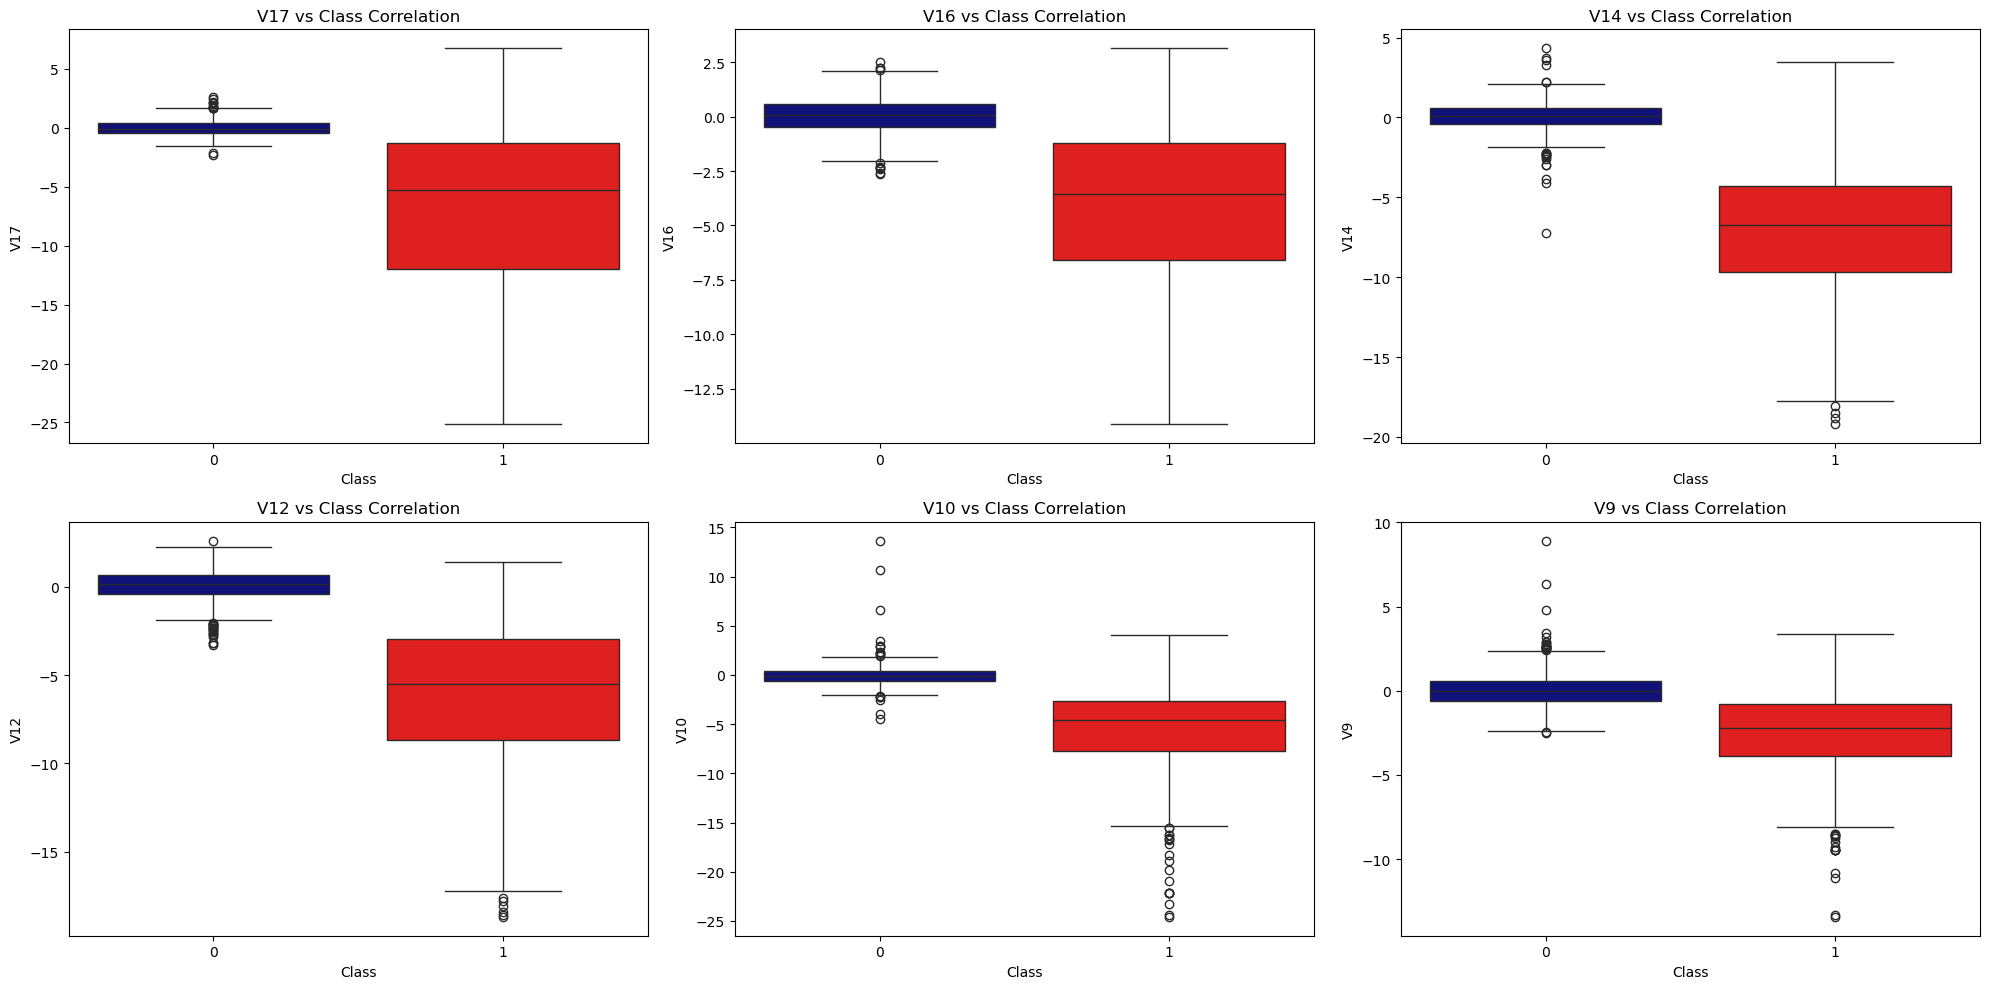

In [19]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

features = ["V17","V16", "V14", "V12", "V10", "V9"]

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x="Class", y=feature, data=new_df, palette=colors, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Class Correlation')

plt.tight_layout()
plt.show()

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

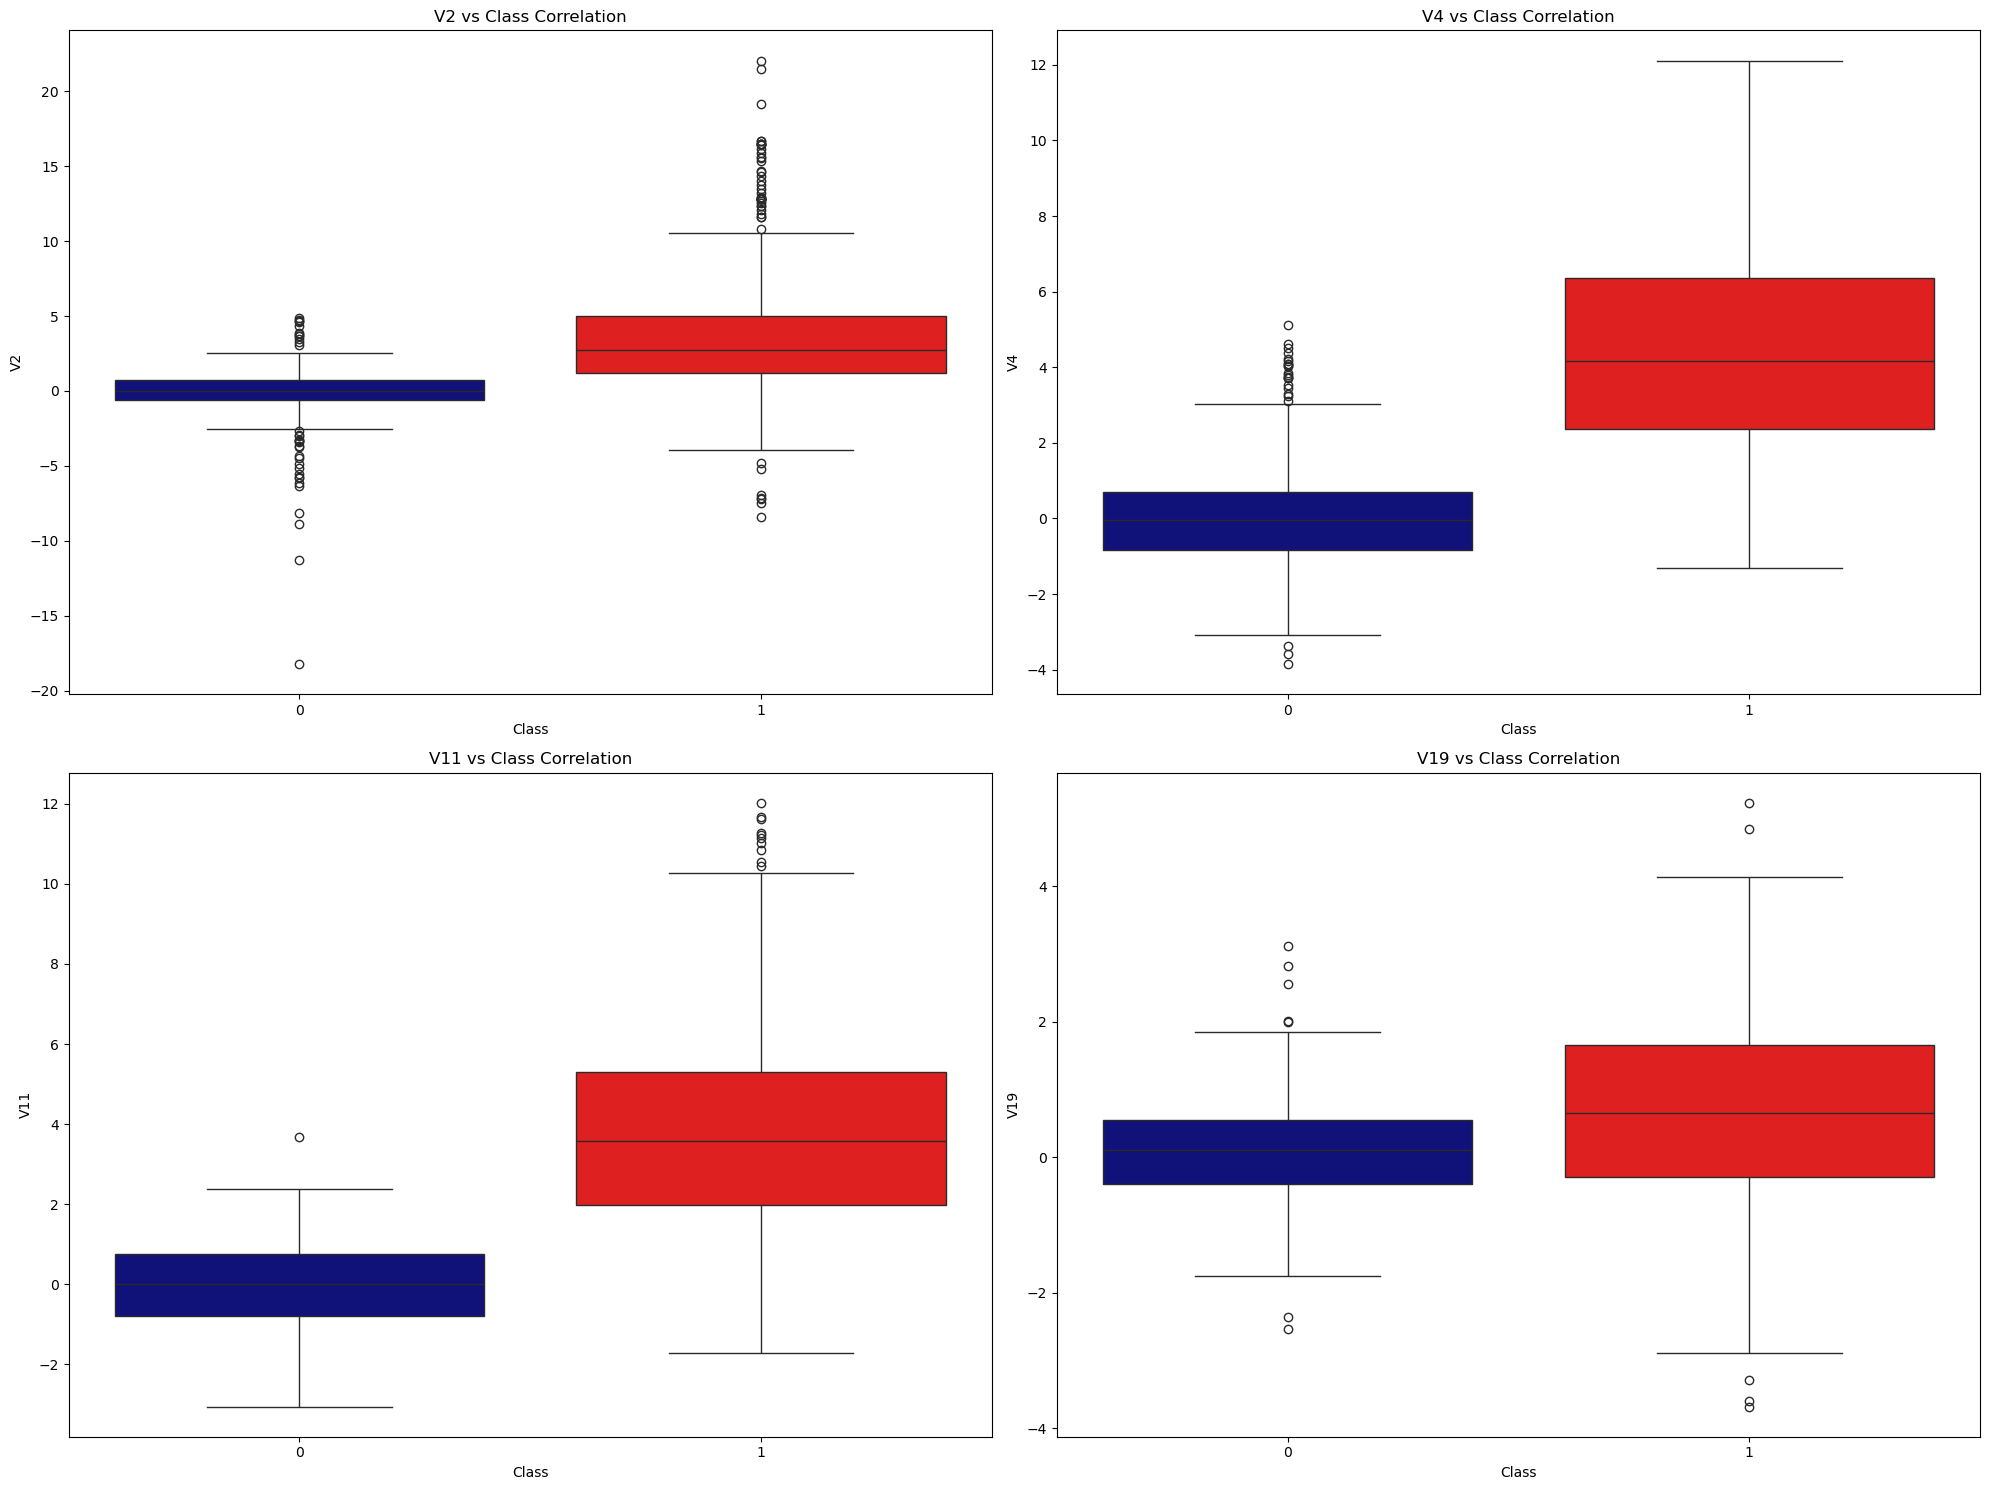

In [20]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

features = ["V2","V4", "V11", "V19"]

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.boxplot(x="Class", y=feature, data=new_df, palette=colors, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Class Correlation', fontsize = 12)

plt.tight_layout()
plt.show()

### Identifying and Removing Extreme Outliers

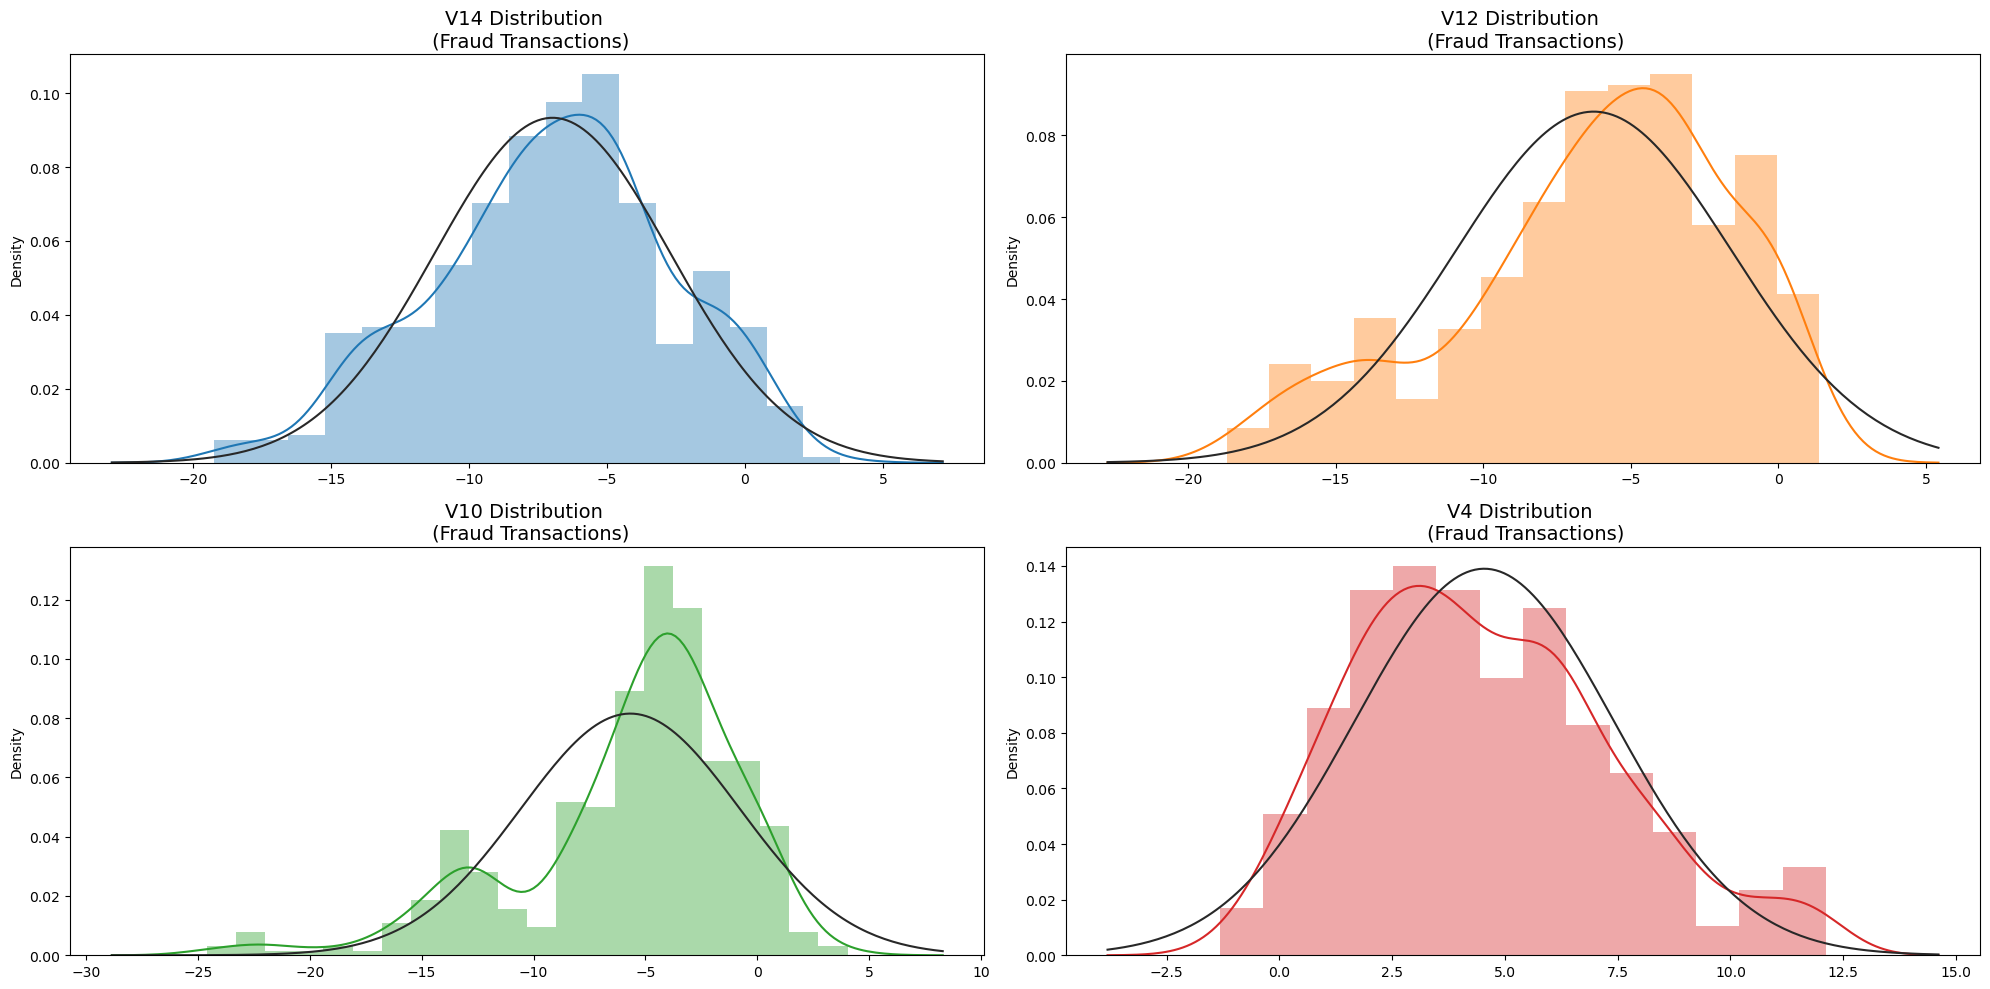

In [21]:
from scipy.stats import norm

features = ["V14", "V12", "V10", "V4"]

rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    fraud_values = new_df[feature].loc[new_df['Class'] == 1].values
    sns.distplot(fraud_values, ax=axes[i], fit=norm, color=f'C{i % 10}')
    axes[i].set_title(f'{feature} Distribution \n (Fraud Transactions)', fontsize=14)

for j in range(len(features), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Removing extreme outliers from features V14, V12, V10 and V4 in the dataset by applying the Interquartile Range (IQR) method to detect and drop instances that exceed a threshold, which improves the data quality and reduces distortion in machine learning models.

In [22]:
# -----> V14 Removing Outliers 
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

print('Feature V14:')
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
print(f'IQR: {v14_iqr}')
print(f'Cut Off: {v14_cut_off}')
print(f'Lower: {v14_lower} | Upper: {v14_upper}')
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print(f'Outliers: {len(outliers)}')
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 22)

# -----> V12 Removing Outliers
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off

print('Feature V12:')
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
print(f'IQR: {v12_iqr}')
print(f'Cut Off: {v12_cut_off}')
print(f'Lower: {v12_lower} | Upper: {v12_upper}')
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print(f'Outliers: {len(outliers)}')
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('----' * 22)

# -----> V10 Removing Outliers
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

print('Feature V10:')
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
print(f'IQR: {v10_iqr}')
print(f'Cut Off: {v10_cut_off}')
print(f'Lower: {v10_lower} | Upper: {v10_upper}')
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print(f'Outliers: {len(outliers)}')
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('----' * 22)

# -----> V4 Removing Outliers
v4_fraud = new_df['V4'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v4_fraud, 25), np.percentile(v4_fraud, 75)
v4_iqr = q75 - q25
v4_cut_off = v4_iqr * 1.5
v4_lower, v4_upper = q25 - v4_cut_off, q75 + v4_cut_off

print('Feature V4:')
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
print(f'IQR: {v4_iqr}')
print(f'Cut Off: {v4_cut_off}')
print(f'Lower: {v4_lower} | Upper: {v4_upper}')
outliers = [x for x in v4_fraud if x < v4_lower or x > v4_upper]
print(f'Outliers: {len(outliers)}')
new_df = new_df.drop(new_df[(new_df['V4'] > v4_upper) | (new_df['V4'] < v4_lower)].index)
print('----' * 22)


print(f'Number of Instances after outlier removal: {len(new_df)}')


Feature V14:
Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
IQR: 5.409902115485521
Cut Off: 8.114853173228282
Lower: -17.807576138200666 | Upper: 3.8320323237414167
Outliers: 4
----------------------------------------------------------------------------------------
Feature V12:
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
IQR: 5.780002635714835
Cut Off: 8.670003953572252
Lower: -17.3430371579634 | Upper: 5.776973384895937
Outliers: 4
----------------------------------------------------------------------------------------
Feature V10:
Quartile 25: -7.466658535821847 | Quartile 75: -2.5118611381562523
IQR: 4.954797397665595
Cut Off: 7.432196096498393
Lower: -14.89885463232024 | Upper: 4.92033495834214
Outliers: 27
----------------------------------------------------------------------------------------
Feature V4:
Quartile 25: 2.23799063903423 | Quartile 75: 6.03734512826846
IQR: 3.79935448923423
Cut Off: 5.699031733851346
Lower: -3.4610410948171157 

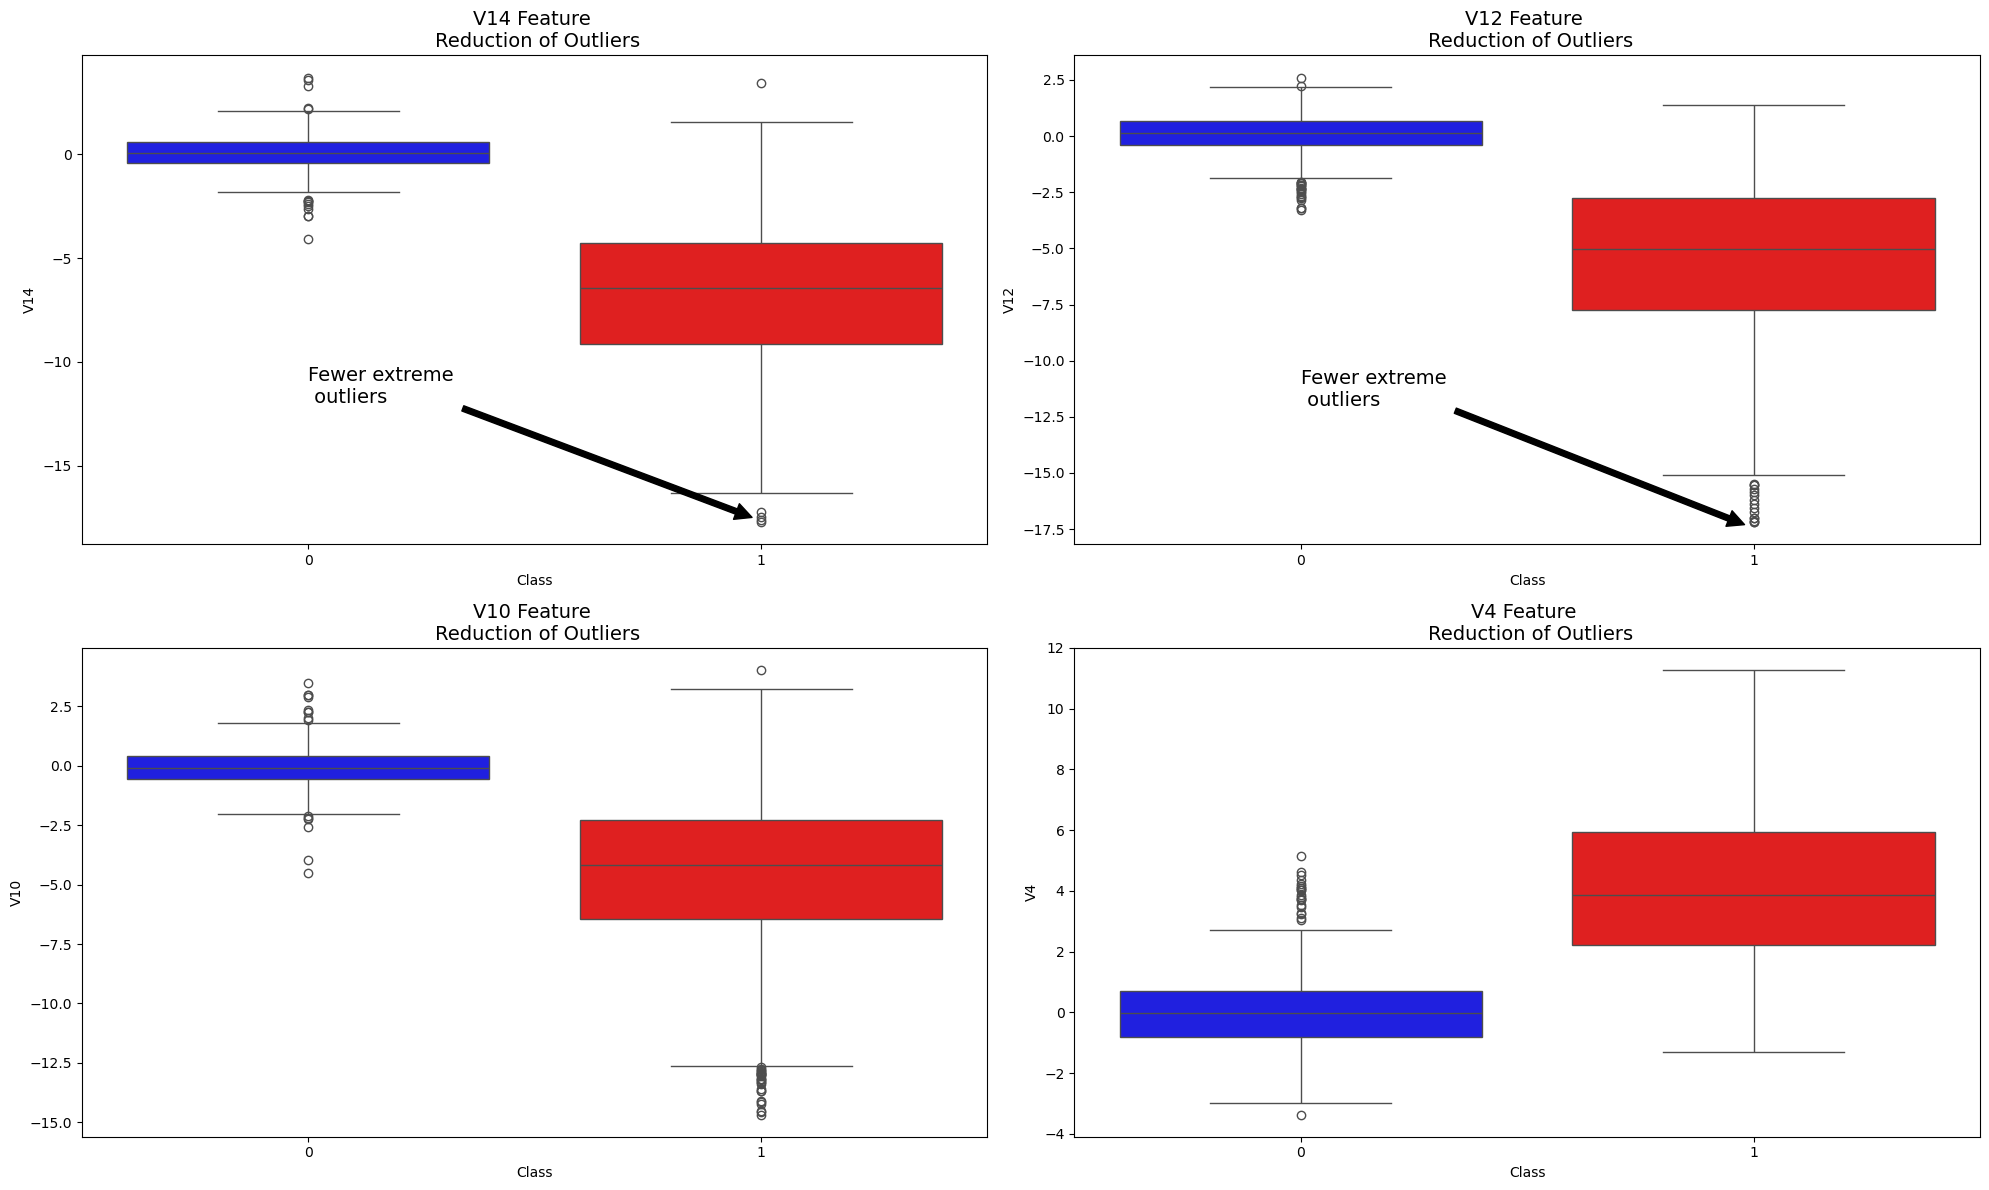

In [23]:
f, axes = plt.subplots(2, 2, figsize=(20, 12))

colors = ['blue', 'red']

# Boxplot for V14
sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[0, 0], palette=colors)
axes[0, 0].set_title("V14 Feature \n Reduction of Outliers", fontsize=14)
axes[0, 0].annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12), arrowprops=dict(facecolor='black'),fontsize=14)

# Boxplot for V12
sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[0, 1], palette=colors)
axes[0, 1].set_title("V12 Feature \n Reduction of Outliers", fontsize=14)
axes[0, 1].annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12), arrowprops=dict(facecolor='black'), fontsize=14)

# Boxplot for V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[1, 0], palette=colors)
axes[1, 0].set_title("V10 Feature \n Reduction of Outliers", fontsize=14)
axes[1, 0].annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12), arrowprops=dict(facecolor='black'), fontsize=14)

# Boxplot for V4
sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1, 1], palette=colors)
axes[1, 1].set_title("V4 Feature \n Reduction of Outliers", fontsize=14)
axes[1, 1].annotate('Fewer extreme \n outliers', xy=(0.95, -5), xytext=(0, -3), arrowprops=dict(facecolor='black'), fontsize=14)


plt.tight_layout()
plt.show()


In [24]:
X = new_df.drop('Class', axis=1) 
y = new_df['Class']             

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 1.1e+01 s
PCA took 0.0027 s
Truncated SVD took 0.0054 s


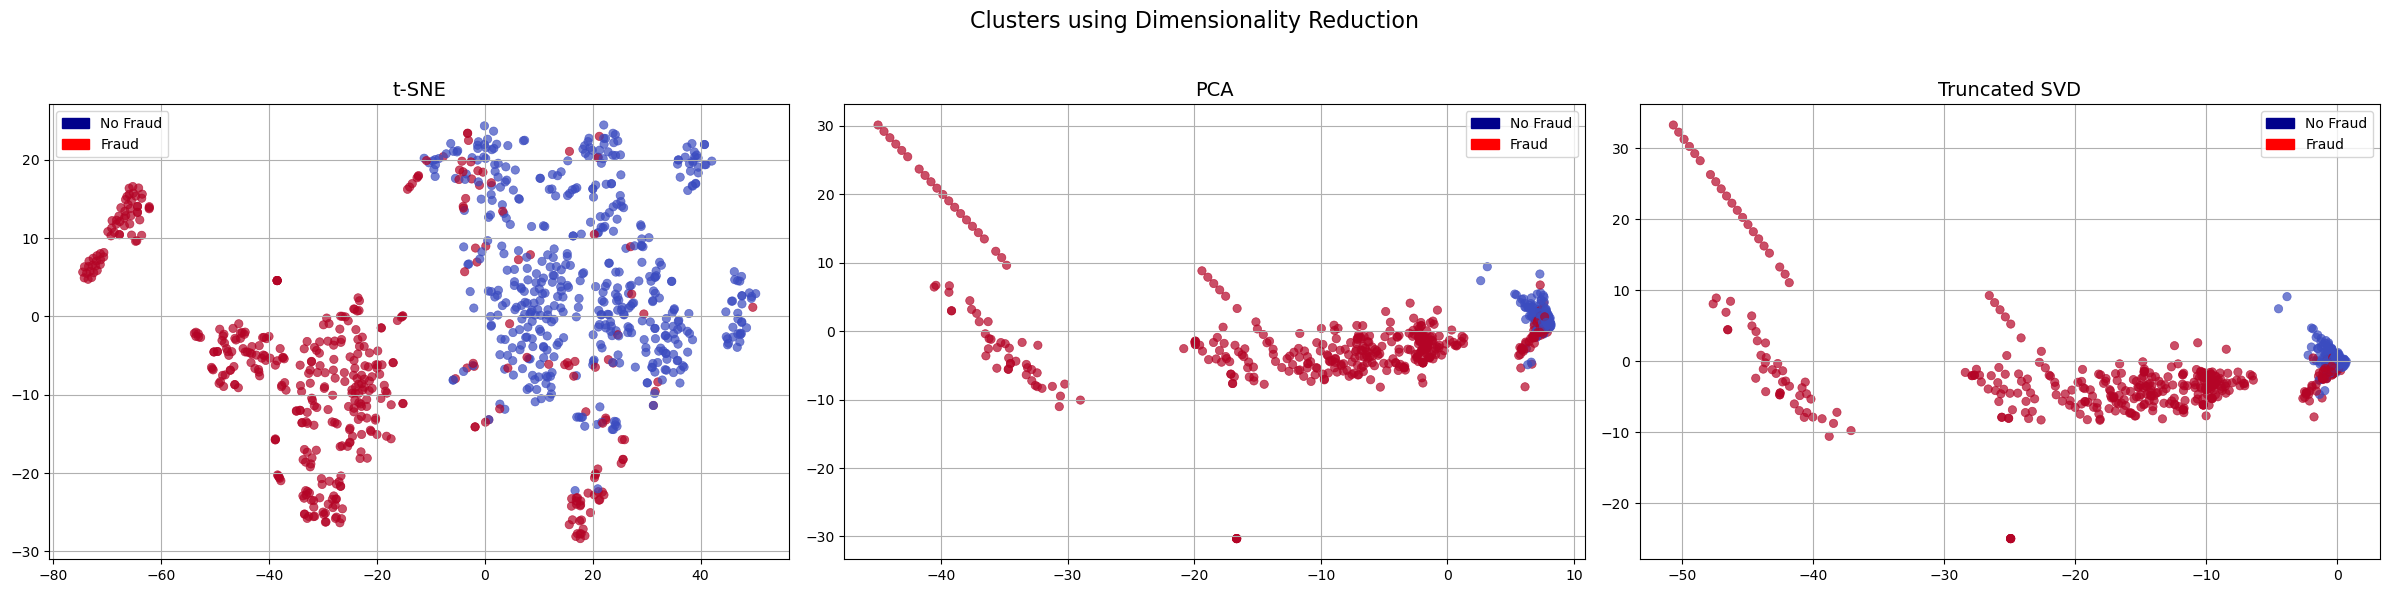

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=16)

colors = ['darkblue', 'red'] 
blue_patch = mpatches.Patch(color=colors[0], label='No Fraud')
red_patch = mpatches.Patch(color=colors[1], label='Fraud')

# t-SNE scatter plot
scatter_tsne = ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='coolwarm', linewidths=0.5, alpha=0.7)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
scatter_pca = ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='coolwarm', linewidths=0.5, alpha=0.7)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# Truncated SVD scatter plot
scatter_svd = ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=y, cmap='coolwarm', linewidths=0.5, alpha=0.7)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

### Classification
Implementing classification models on the X_train and y_train datasets, applying cross-validation for each model to estimate the performance

In [26]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [27]:
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


Using GridSearchCV to find the best parameters

In [28]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grids for GridSearchCV
log_reg_params = {
    "penalty": ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

knears_params = {
    "n_neighbors": list(range(2, 5, 1)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

svc_params = {
    'C': [0.5, 0.7, 0.9, 1],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

tree_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2, 4, 1)),
    "min_samples_leaf": list(range(5, 7, 1))
}

# Performing GridSearchCV for each classifier and selecting the best estimator
# Logistic Regression
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# K-Nearest Neighbors
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# Decision Tree Classifier
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

# Cross-validation scores for each best model
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score: ', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score: ', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score: ', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.85%
Knears Neighbors Cross Validation Score:  93.32%
Support Vector Classifier Cross Validation Score:  93.85%
DecisionTree Classifier Cross Validation Score:  91.85%


In [29]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']


sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Initializing the classifier
log_reg = LogisticRegression(max_iter=1000)

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
# Viewing the label distribution after NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution:', Counter(y_nearmiss))

# Cross-Validation using StratifiedShuffleSplit
for train_index, test_index in sss.split(undersample_X, undersample_y):
    # Splitting data for this fold
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

    # Converting to numpy arrays
    undersample_Xtrain = undersample_Xtrain.values
    undersample_Xtest = undersample_Xtest.values
    undersample_ytrain = undersample_ytrain.values
    undersample_ytest = undersample_ytest.values

    # Creating a pipeline with NearMiss and Logistic Regression
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    
    # Fiting the model
    undersample_pipeline.fit(undersample_Xtrain, undersample_ytrain)
    
    # Predicting on the test set
    undersample_prediction = undersample_pipeline.predict(undersample_Xtest)
    
    # Collecting metrics for this fold
    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtest, undersample_ytest))
    undersample_precision.append(precision_score(undersample_ytest, undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytest, undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytest, undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytest, undersample_prediction))

print("\nMetrics Across All Folds:")
print("Accuracy: {:.2f}%".format(np.mean(undersample_accuracy) * 100))
print("Precision: {:.2f}%".format(np.mean(undersample_precision) * 100))
print("Recall: {:.2f}%".format(np.mean(undersample_recall) * 100))
print("F1 Score: {:.2f}%".format(np.mean(undersample_f1) * 100))
print("AUC Score: {:.2f}%".format(np.mean(undersample_auc) * 100))

NearMiss Label Distribution: Counter({0: 492, 1: 492})

Metrics Across All Folds:
Accuracy: 61.49%
Precision: 0.42%
Recall: 94.08%
F1 Score: 0.84%
AUC Score: 77.76%


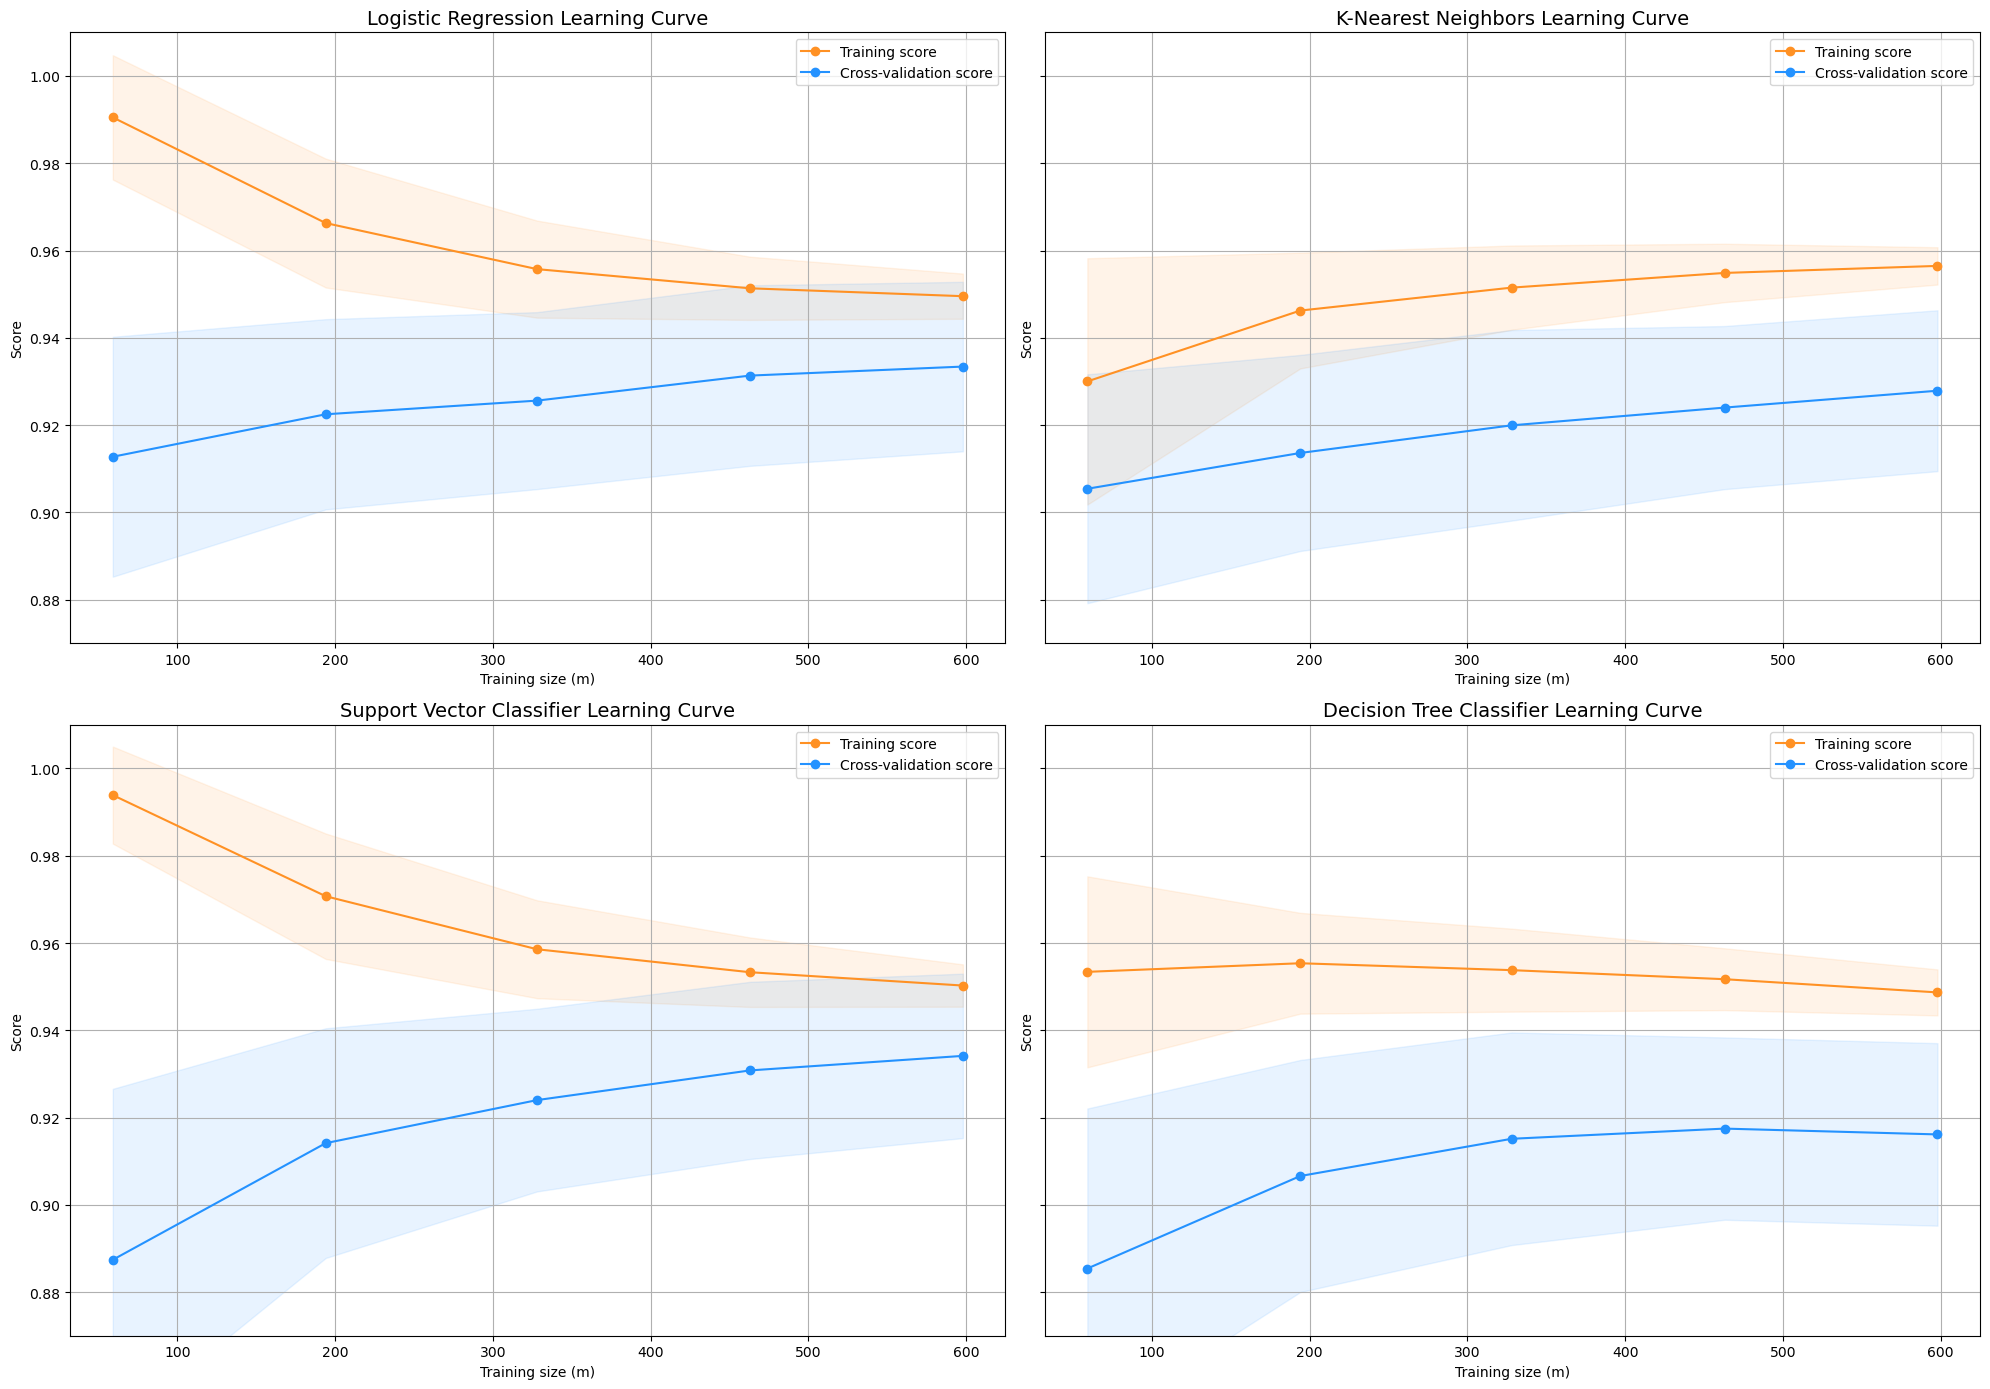

In [30]:
from sklearn.model_selection import ShuffleSplit, learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots learning curves for four estimators on the same dataset.

    Parameters:
    - estimator1, estimator2, estimator3, estimator4: Estimator objects.
    - X: Feature matrix.
    - y: Target vector.
    - ylim: Tuple specifying y-axis limits.
    - cv: Cross-validation splitting strategy.
    - n_jobs: Number of jobs to run in parallel.
    - train_sizes: Relative or absolute sizes of the training set for the learning curve.
    """
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14), sharey=True)
    
    if ylim is not None:
        plt.ylim(*ylim)

    # Defining subplots and estimators
    axes = [ax1, ax2, ax3, ax4]
    estimators = [estimator1, estimator2, estimator3, estimator4]
    titles = [
        "Logistic Regression Learning Curve",
        "K-Nearest Neighbors Learning Curve",
        "Support Vector Classifier Learning Curve",
        "Decision Tree Classifier Learning Curve"
    ]

    for ax, estimator, title in zip(axes, estimators, titles):
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
        )
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
        ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Training size (m)')
        ax.set_ylabel('Score')
        ax.grid(True)
        ax.legend(loc="best")

    return plt


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot = plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, ylim=(0.87, 1.01), cv=cv, n_jobs=4)
plot.tight_layout()
plot.show()


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Logistic Regression
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

# K-Nearest Neighbors
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

# Support Vector Classifier
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")

# Decision Tree Classifier
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

# Calculating AUC-ROC scores
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('K-Nearest Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))


Logistic Regression:  0.9715943274602493
K-Nearest Neighbors:  0.9309697751038534
Support Vector Classifier:  0.9689013035381749
Decision Tree Classifier:  0.9177839851024209


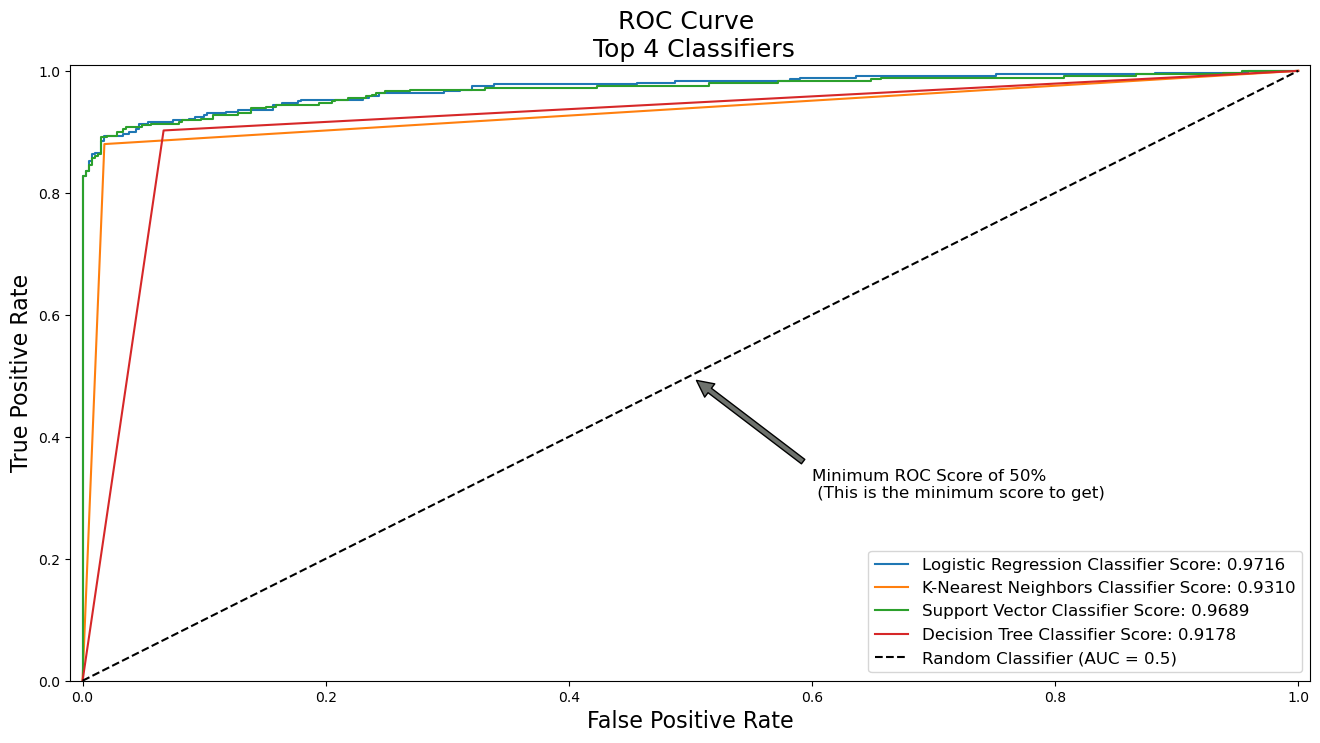

In [32]:
# Calculating FPR, TPR, and thresholds for each classifier
log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

# Ploting ROC curves
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16, 8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    
    # Logistic Regression ROC
    plt.plot(
        log_fpr, log_tpr,
        label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred))
    )
    
    # K-Nearest Neighbors ROC
    plt.plot(
        knear_fpr, knear_tpr,
        label='K-Nearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred))
    )
    
    # Support Vector Classifier ROC
    plt.plot(
        svc_fpr, svc_tpr,
        label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred))
    )
    
    # Decision Tree Classifier ROC
    plt.plot(
        tree_fpr, tree_tpr,
        label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred))
    )
    
    # Random baseline
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
    
    # Setting plot limits
    plt.axis([-0.01, 1.01, 0, 1.01])
    
    # Adding labels and annotations
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate(
        'Minimum ROC Score of 50% \n (This is the minimum score to get)',
        xy=(0.5, 0.5), xytext=(0.6, 0.3),
        arrowprops=dict(facecolor='#6E726D', shrink=0.05),
        fontsize=12
    )
    

    plt.legend(fontsize=12)
    plt.show()


graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)


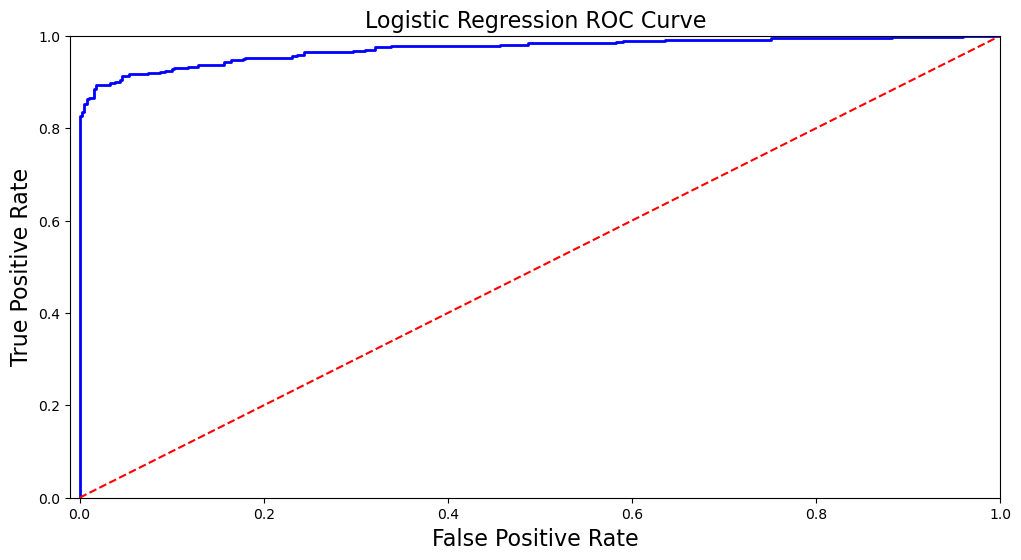

In [33]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,6))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--',label='Random Classifier (AUC = 0.5)')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [34]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.93
Precision Score: 0.68
F1 Score: 0.79
Accuracy Score: 0.76
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.61
Precision Score: 0.00
Recall Score: 0.94
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [35]:
from sklearn.metrics import average_precision_score

undersample_y_score = log_reg.decision_function(original_Xtest)
undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.02


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.02')

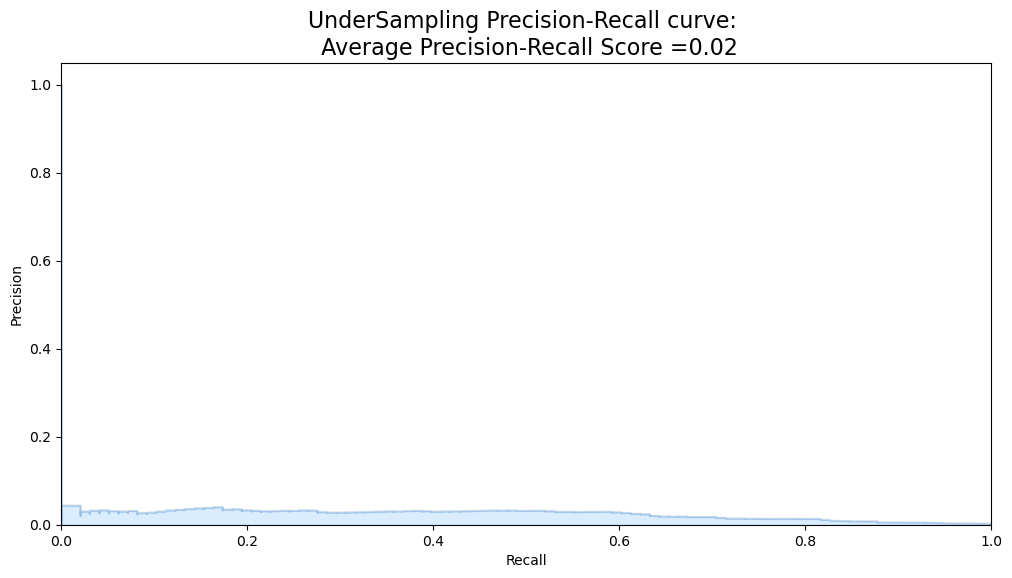

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9780113673769449
precision: 0.06522614927214539
recall: 0.8759493670886076
f1: 0.12140246785036941
---------------------------------------------------------------------------------------------------------------------------------------


In [38]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56864
       Fraud       0.06      0.90      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [39]:
y_score = best_est.decision_function(original_Xtest)  

average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.68


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.68')

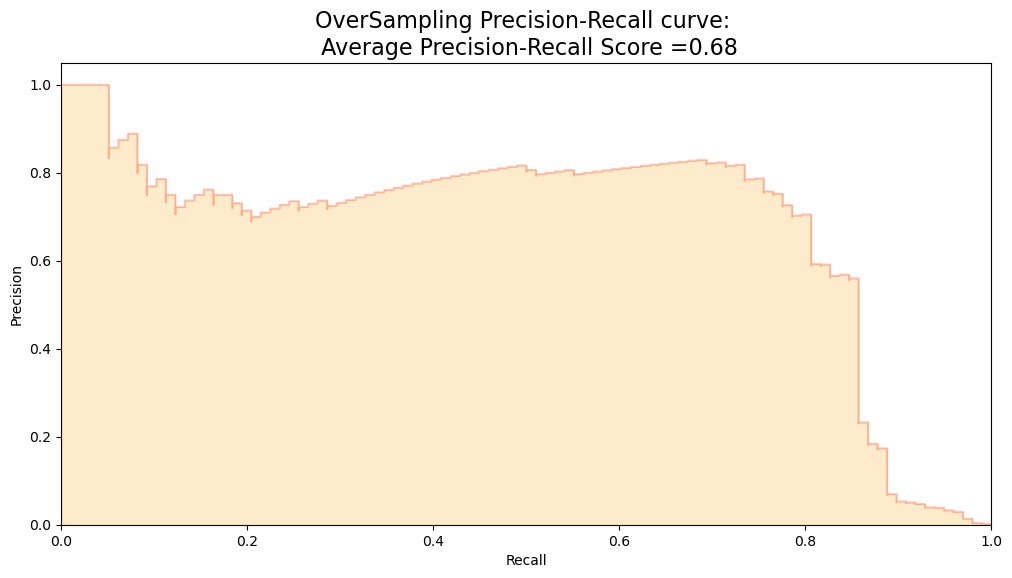

In [40]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

In [41]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [42]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :3.840697765350342 sec


### Test Data with Logistic Regression: Confusion Matrix

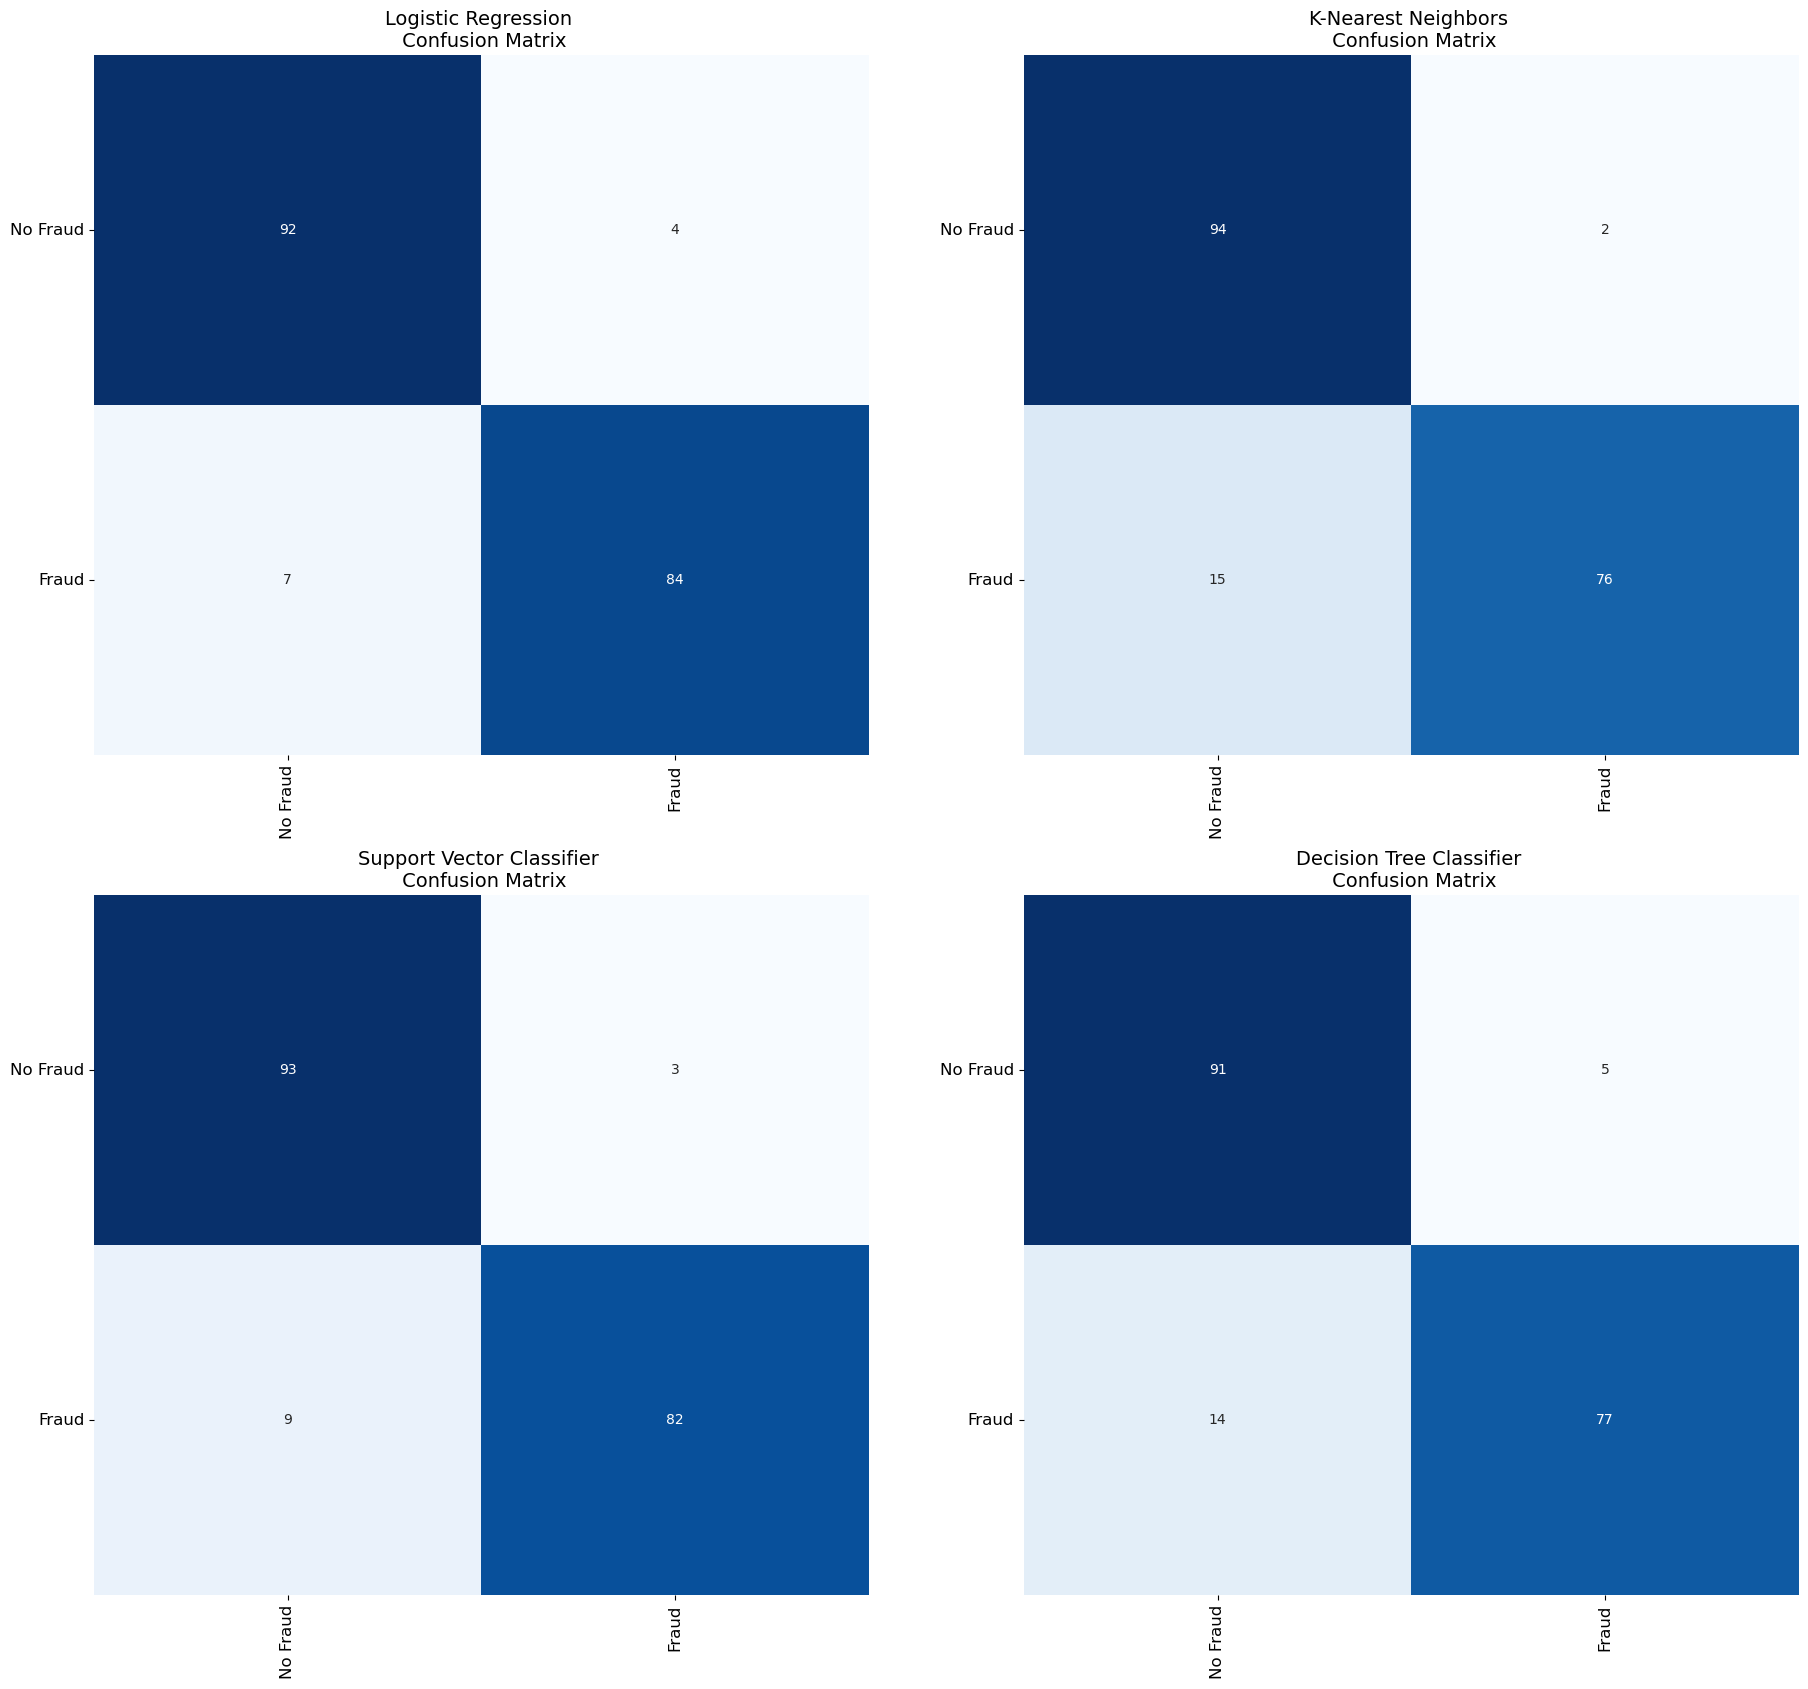

In [43]:

from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

# Confusion matrices for each model
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

# Setting up the figure for plotting
fig, ax = plt.subplots(2, 2, figsize=(22, 20))

# Ploting confusion matrix for Logistic Regression
sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap='Blues', fmt='g', cbar=False)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=90)
ax[0, 0].set_yticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=0)

# Ploting confusion matrix for K-Nearest Neighbors
sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap='Blues', fmt='g', cbar=False)
ax[0][1].set_title("K-Nearest Neighbors \n Confusion Matrix", fontsize=14)
ax[0, 1].set_xticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=90)
ax[0, 1].set_yticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=0)

# Ploting confusion matrix for Support Vector Classifier
sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap='Blues', fmt='g', cbar=False)
ax[1, 0].set_title("Support Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=90)
ax[1, 0].set_yticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=0)

# Ploting confusion matrix for Decision Tree Classifier
sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap='Blues', fmt='g', cbar=False)
ax[1, 1].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
ax[1, 1].set_xticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=90)
ax[1, 1].set_yticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=0)


plt.show()


In [44]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        96
           1       0.95      0.92      0.94        91

    accuracy                           0.94       187
   macro avg       0.94      0.94      0.94       187
weighted avg       0.94      0.94      0.94       187

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        96
           1       0.97      0.84      0.90        91

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        96
           1       0.96      0.90      0.93        91

    accuracy                           0.94       187
   macro avg       0.94      0.93      0.94       187
weighted

In [45]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)


# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random UnderSampling,0.737968
1,Oversampling (SMOTE),0.976914


### Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE)

In [46]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [47]:
undersample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [49]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
24/24 - 5s - 191ms/step - accuracy: 0.6622 - loss: 0.6225 - val_accuracy: 0.7800 - val_loss: 0.4553
Epoch 2/20
24/24 - 0s - 8ms/step - accuracy: 0.8763 - loss: 0.3539 - val_accuracy: 0.9133 - val_loss: 0.3135
Epoch 3/20
24/24 - 0s - 7ms/step - accuracy: 0.9164 - loss: 0.2727 - val_accuracy: 0.9333 - val_loss: 0.2526
Epoch 4/20
24/24 - 0s - 6ms/step - accuracy: 0.9281 - loss: 0.2259 - val_accuracy: 0.9400 - val_loss: 0.2171
Epoch 5/20
24/24 - 0s - 9ms/step - accuracy: 0.9314 - loss: 0.1983 - val_accuracy: 0.9400 - val_loss: 0.1970
Epoch 6/20
24/24 - 0s - 13ms/step - accuracy: 0.9381 - loss: 0.1799 - val_accuracy: 0.9400 - val_loss: 0.1879
Epoch 7/20
24/24 - 0s - 6ms/step - accuracy: 0.9398 - loss: 0.1662 - val_accuracy: 0.9400 - val_loss: 0.1783
Epoch 8/20
24/24 - 0s - 5ms/step - accuracy: 0.9431 - loss: 0.1554 - val_accuracy: 0.9400 - val_loss: 0.1745
Epoch 9/20
24/24 - 0s - 4ms/step - accuracy: 0.9448 - loss: 0.1464 - val_accuracy: 0.9400 - val_loss: 0.1712
Epoch 10/20
24/2

In [50]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [51]:
undersample_fraud_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[55193  1671]
 [    6    92]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


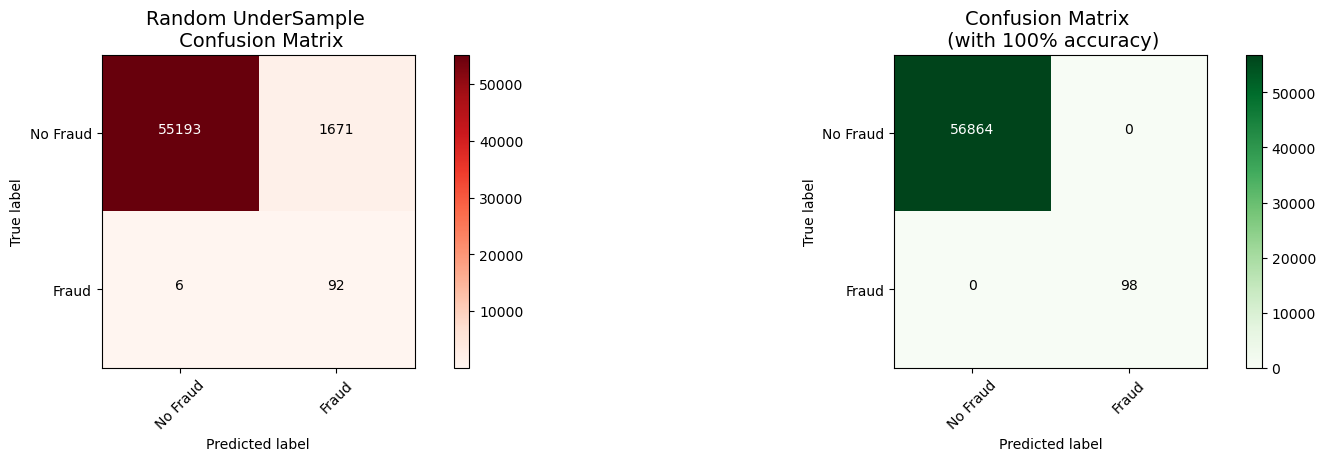

In [52]:
import itertools

# Assuming `undersample_fraud_predictions` contains probabilities, we threshold them
if undersample_fraud_predictions.ndim > 1:  # If multi-dimensional (e.g., probabilities for each class)
    if undersample_fraud_predictions.shape[1] > 1:  # If multiple class probabilities
        # Convert probabilities to binary labels (class 1 is positive class, 0 is negative class)
        undersample_fraud_predictions = (undersample_fraud_predictions[:, 1] >= 0.5).astype(int)
    else:
        # If there is only one probability column, directly apply the threshold
        undersample_fraud_predictions = (undersample_fraud_predictions >= 0.5).astype(int)
else:
    # If predictions are already in binary format, no need to threshold
    undersample_fraud_predictions = undersample_fraud_predictions.astype(int)

# Create confusion matrix
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

# Labels for the confusion matrix
labels = ['No Fraud', 'Fraud']

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [53]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [54]:
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 4s - 4ms/step - accuracy: 0.9652 - loss: 0.0896 - val_accuracy: 0.9865 - val_loss: 0.0379
Epoch 2/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9948 - loss: 0.0187 - val_accuracy: 0.9990 - val_loss: 0.0139
Epoch 3/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9978 - loss: 0.0098 - val_accuracy: 0.9983 - val_loss: 0.0133
Epoch 4/20
1214/1214 - 3s - 2ms/step - accuracy: 0.9986 - loss: 0.0065 - val_accuracy: 0.9999 - val_loss: 0.0057
Epoch 5/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9990 - loss: 0.0047 - val_accuracy: 0.9997 - val_loss: 0.0028
Epoch 6/20
1214/1214 - 4s - 4ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 7/20
1214/1214 - 3s - 3ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 9/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9997 - 

In [56]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)


In [57]:
oversample_fraud_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[56815    49]
 [   20    78]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


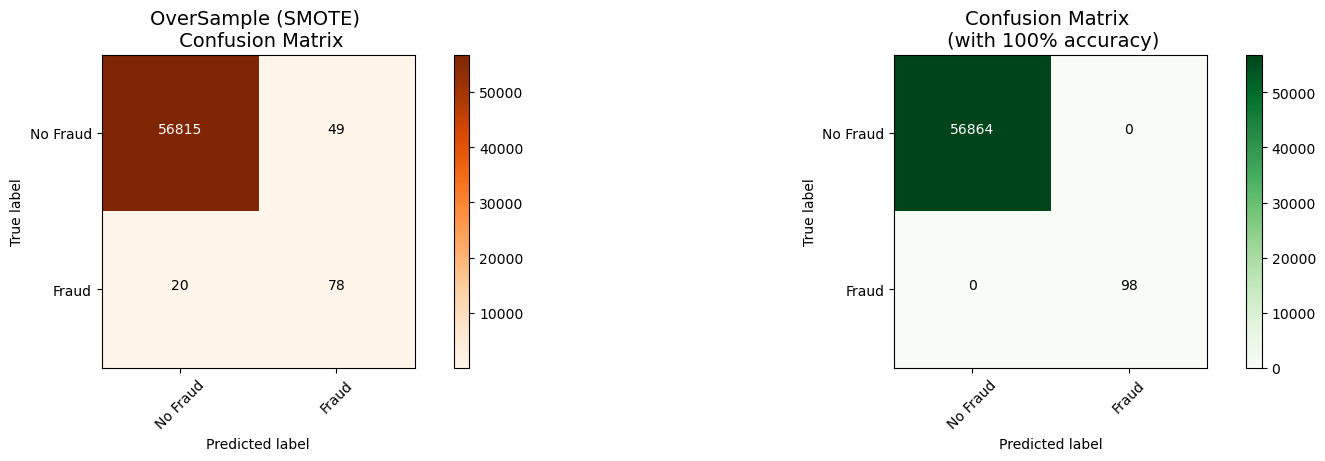

In [59]:
# Assuming `oversample_fraud_predictions` contains probabilities, we threshold them
if oversample_fraud_predictions.ndim > 1:  # If multi-dimensional (e.g., probabilities for each class)
    if oversample_fraud_predictions.shape[1] > 1:  # If multiple class probabilities
        # Converting probabilities to binary labels (class 1 is positive class, 0 is negative class)
        oversample_fraud_predictions = (oversample_fraud_predictions[:, 1] >= 0.5).astype(int)
    else:
        # If there is only one probability column, directly apply the threshold
        oversample_fraud_predictions = (oversample_fraud_predictions >= 0.5).astype(int)
else:
    # If predictions are already in binary format, no need to threshold
    oversample_fraud_predictions = oversample_fraud_predictions.astype(int)

oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### Summary
* The dataset is highly imbalanced, with fraudulent transactions constituting only 0.17% of the total. This imbalance posed significant challenges for standard machine learning models, which tended to predict the majority class (non-fraudulent transactions) more often.
* Certain features exhibited strong correlations with fraud, both positively (e.g., V4, V11, V19) and negatively (e.g., V10, V12, V14), aiding in feature importance evaluation.
* Random Under-Sampling balanced the dataset but resulted in loss of data, which reduced the overall learning potential of the models.
* SMOTE (Oversampling) improved model performance significantly by synthetically generating samples for the minority class. SMOTE outperformed Random Under-Sampling, especially in metrics like recall and F1-score.
* Random Under-Sampling: Balanced the dataset but resulted in loss of data, which reduced the overall learning potential of the models.
SMOTE (Oversampling): Improved model performance significantly by synthetically generating samples for the minority class. SMOTE outperformed Random Under-Sampling, especially in metrics like recall and F1-score.
* Removing extreme outliers (e.g., for features like V14, V12, V10, V4) improved data quality and reduced distortion in predictions.
* The use of RobustScaler to scale the Time and Amount features handled outliers effectively and improved model convergence.
* Among traditional machine learning models, Logistic Regression and Support Vector Machines achieved the best results, with high accuracy (~94%-97%) and AUC-ROC scores (0.974).
* Decision Tree and K-Nearest Neighbors (KNN) models performed comparatively worse, being more sensitive to imbalanced data.
* Random Under-Sampling: Moderate accuracy and precision but a high recall due to the focus on fraud cases.
* SMOTE: High recall (capturing most fraudulent cases), moderate precision, and significantly better F1-scores compared to undersampling.
* Logistic Regression with SMOTE yielded the best combination of performance metrics for this dataset.